In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

In [2]:
#Loading the dataset
data = [ 446.6565,454.4733,455.663,423.6322,456.2713,440.5881,425.3325,485.1494,506.0482,526.792,514.2689,494.211,]
index = pd.date_range(start="1996", end="2008", freq="A")
oildata = pd.Series(data, index)

data = [17.5534,21.86,23.8866,26.9293,26.8885,28.8314,30.0751,30.9535,30.1857,31.5797,32.5776,33.4774,39.0216,41.3864,41.5966,]
index = pd.date_range(start="1990", end="2005", freq="A")
air = pd.Series(data, index)

data = [263.9177,268.3072,260.6626,266.6394,277.5158,283.834,290.309,292.4742,300.8307,309.2867,318.3311,329.3724,338.884,339.2441,328.6006,314.2554,314.4597,321.4138,329.7893,346.3852,352.2979,348.3705,417.5629,417.1236,417.7495,412.2339,411.9468,394.6971,401.4993,408.2705,414.2428,]
index = pd.date_range(start="1970", end="2001", freq="A")
livestock2 = pd.Series(data, index)

data = [407.9979, 403.4608, 413.8249, 428.105, 445.3387, 452.9942, 455.7402]
index = pd.date_range(start="2001", end="2008", freq="A")
livestock3 = pd.Series(data, index)

data = [41.7275,24.0418,32.3281,37.3287,46.2132,29.3463,36.4829,42.9777,48.9015,31.1802,37.7179,40.4202,51.2069,31.8872,40.9783,43.7725,55.5586,33.8509,42.0764,45.6423,59.7668,35.1919,44.3197,47.9137,]
index = pd.date_range(start="2005", end="2010-Q4", freq="QS-OCT")
aust = pd.Series(data, index)

# Simple Exponential Smoothing
Lets use Simple Exponential Smoothing to forecast the below oil data.

Figure 1: Oil production in Saudi Arabia from 1996 to 2007.


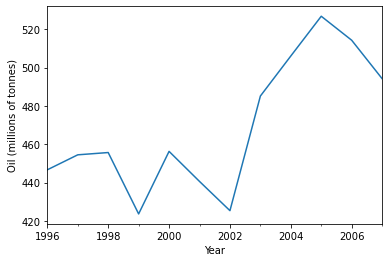

In [3]:
ax = oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 1: Oil production in USA from 1996 to 2007.")

In [4]:
def simple_exp_smoothing(data): 
    fit1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
        smoothing_level=0.2, optimized=False
    )
    fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
    fit2 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
        smoothing_level=0.6, optimized=False
    )
    fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
    fit3 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
    fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

    plt.figure(figsize=(12, 8))
    plt.plot(data, marker="o", color="black")
    plt.plot(fit1.fittedvalues, marker="o", color="blue")
    (line1,) = plt.plot(fcast1, marker="o", color="blue")
    plt.plot(fit2.fittedvalues, marker="o", color="red")
    (line2,) = plt.plot(fcast2, marker="o", color="red")
    plt.plot(fit3.fittedvalues, marker="o", color="green")
    (line3,) = plt.plot(fcast3, marker="o", color="green")
    plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])



C:\Users\Jitender_bhatt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


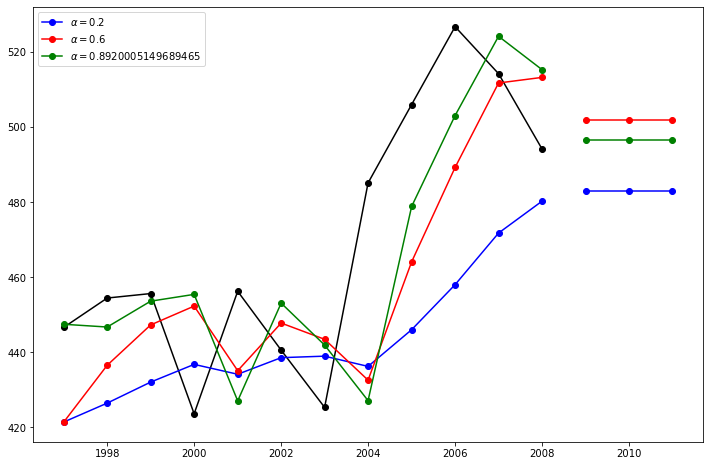

In [5]:
simple_exp_smoothing(oildata)

In [6]:
def holts_exp_smoothing(data):
    fit1 = Holt(data, initialization_method="estimated").fit(
        smoothing_level=0.8, smoothing_trend=0.2, optimized=False
    )
    fcast1 = fit1.forecast(5).rename("Holt's linear trend")
    fit2 = Holt(data, exponential=True, initialization_method="estimated").fit(
        smoothing_level=0.8, smoothing_trend=0.2, optimized=False
    )
    fcast2 = fit2.forecast(5).rename("Exponential trend")
    fit3 = Holt(data, damped_trend=True, initialization_method="estimated").fit(
        smoothing_level=0.8, smoothing_trend=0.2
    )
    fcast3 = fit3.forecast(5).rename("Additive damped trend")

    plt.figure(figsize=(12, 8))
    plt.plot(data, marker="o", color="black")
    plt.plot(fit1.fittedvalues, color="blue")
    (line1,) = plt.plot(fcast1, marker="o", color="blue")
    plt.plot(fit2.fittedvalues, color="red")
    (line2,) = plt.plot(fcast2, marker="o", color="red")
    plt.plot(fit3.fittedvalues, color="green")
    (line3,) = plt.plot(fcast3, marker="o", color="green")
    plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

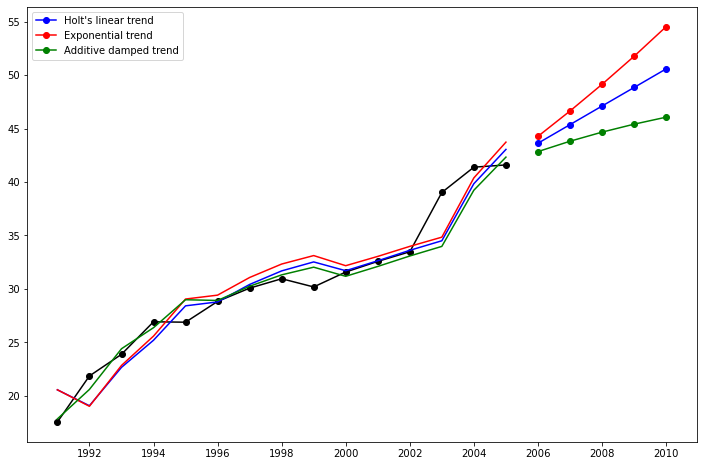

In [7]:
holts_exp_smoothing(air)

In [9]:
def compare_expadd_damped_nondamped(data):
    fit1 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
    fit2 = Holt(data, initialization_method="estimated").fit()
    fit3 = Holt(data, exponential=True, initialization_method="estimated").fit()
    fit4 = Holt(data, damped_trend=True, initialization_method="estimated").fit(
        damping_trend=0.98
    )
    fit5 = Holt(
        livestock2, exponential=True, damped_trend=True, initialization_method="estimated"
    ).fit()
    params = [
        "smoothing_level",
        "smoothing_trend",
        "damping_trend",
        "initial_level",
        "initial_trend",
    ]
    results = pd.DataFrame(
        index=[r"α", r"β", r"ϕ", r"$l_0$", "$b_0$", "SSE"],
        columns=["SES", "Holt's", "Exponential", "Additive", "Multiplicative"],
    )
    results["SES"] = [fit1.params[p] for p in params] + [fit1.sse]
    results["Holt's"] = [fit2.params[p] for p in params] + [fit2.sse]
    results["Exponential"] = [fit3.params[p] for p in params] + [fit3.sse]
    results["Additive"] = [fit4.params[p] for p in params] + [fit4.sse]
    results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
    print(results)
    
    print("\n\n Plots of Seasonally Adjusted Data")
    print("The following plots allow us to evaluate the level and slope/trend components of the above table’s fits.")
    for fit in [fit2, fit4]:
        pd.DataFrame(np.c_[fit.level, fit.trend]).rename(
        columns={0: "level", 1: "slope"}
        ).plot(subplots=True)
    plt.show()
    print("Figure: Level and slope components for Holt’s linear trend method and the additive damped trend method.")


               SES       Holt's   Exponential     Additive  Multiplicative
α         1.000000     0.974306  9.776735e-01     0.978847        0.974883
β              NaN     0.000000  1.354763e-09     0.000000        0.000024
ϕ              NaN          NaN           NaN     0.980000        0.981629
$l_0$   263.917696   258.880313  2.603423e+02   257.358020      258.942141
$b_0$          NaN     5.010856  1.013780e+00     6.645937        1.038168
SSE    6761.350235  6004.138205  6.104195e+03  6036.555040     6082.148264


 Plots of Seasonally Adjusted Data
The following plots allow us to evaluate the level and slope/trend components of the above table’s fits.


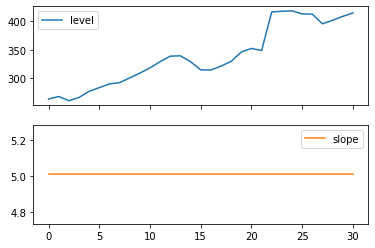

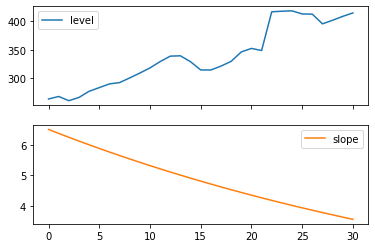

Figure: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [10]:
compare_expadd_damped_nondamped(livestock2)

In [11]:
def compare_forcasting_non_seasonal_methods(data): 
    fit1 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
    fcast1 = fit1.forecast(9).rename("SES")
    fit2 = Holt(data, initialization_method="estimated").fit()
    fcast2 = fit2.forecast(9).rename("Holt's")
    fit3 = Holt(data, exponential=True, initialization_method="estimated").fit()
    fcast3 = fit3.forecast(9).rename("Exponential")
    fit4 = Holt(data, damped_trend=True, initialization_method="estimated").fit(
        damping_trend=0.98
    )
    fcast4 = fit4.forecast(9).rename("Additive Damped")
    fit5 = Holt(
        data, exponential=True, damped_trend=True, initialization_method="estimated"
    ).fit()
    fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

    ax = data.plot(color="black", marker="o", figsize=(12, 8))
    livestock3.plot(ax=ax, color="black", marker="o", legend=False)
    fcast1.plot(ax=ax, color="red", legend=True)
    fcast2.plot(ax=ax, color="green", legend=True)
    fcast3.plot(ax=ax, color="blue", legend=True)
    fcast4.plot(ax=ax, color="cyan", legend=True)
    fcast5.plot(ax=ax, color="magenta", legend=True)
    ax.set_ylabel("Livestock, sheep in Asia (millions)")
    plt.show()
    print(
        "Figure: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods."
    )

C:\Users\Jitender_bhatt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


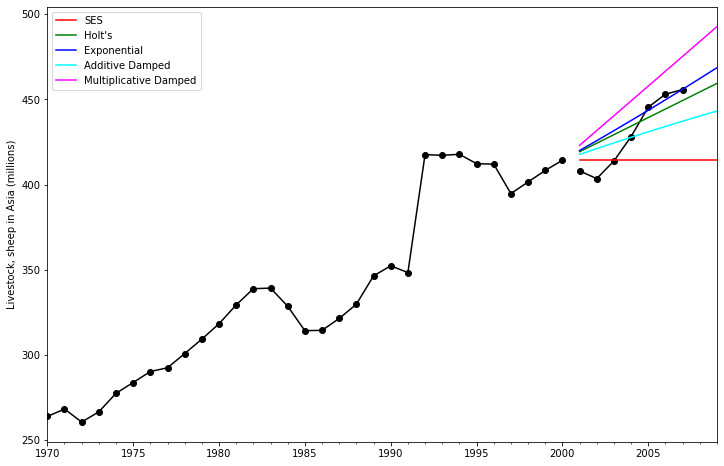

Figure: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [12]:
compare_forcasting_non_seasonal_methods(livestock2)

In [13]:
def holts_winters_seasonal_model(data):
    
    fit1 = ExponentialSmoothing(
        data,
        seasonal_periods=4,
        trend="add",
        seasonal="add",
        use_boxcox=True,
        initialization_method="estimated",
    ).fit()
    fit2 = ExponentialSmoothing(
        data,
        seasonal_periods=4,
        trend="add",
        seasonal="mul",
        use_boxcox=True,
        initialization_method="estimated",
    ).fit()
    fit3 = ExponentialSmoothing(
        data,
        seasonal_periods=4,
        trend="add",
        seasonal="add",
        damped_trend=True,
        use_boxcox=True,
        initialization_method="estimated",
    ).fit()
    fit4 = ExponentialSmoothing(
        data,
        seasonal_periods=4,
        trend="add",
        seasonal="mul",
        damped_trend=True,
        use_boxcox=True,
        initialization_method="estimated",
    ).fit()
    results = pd.DataFrame(
        index=[r"α", r"β", r"ϕ", r"Γ", r"$l_0$", "$b_0$", "SSE"]
    )
    params = [
        "smoothing_level",
        "smoothing_trend",
        "damping_trend",
        "smoothing_seasonal",
        "initial_level",
        "initial_trend",
    ]
    results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
    results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
    results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
    results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

    ax = data.plot(
        figsize=(10, 6),
        marker="o",
        color="black",
        title="Forecasts from Holt-Winters' multiplicative method",
    )
    ax.set_ylabel("International visitor night in Australia (millions)")
    ax.set_xlabel("Year")
    fit1.fittedvalues.plot(ax=ax, style="--", color="red")
    fit2.fittedvalues.plot(ax=ax, style="--", color="green")

    fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
        ax=ax, style="--", marker="o", color="red", legend=True
    )
    fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
        ax=ax, style="--", marker="o", color="green", legend=True
    )

    plt.show()
    print(
        "Figure: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
    )

    print(results)

C:\Users\Jitender_bhatt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Jitender_bhatt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


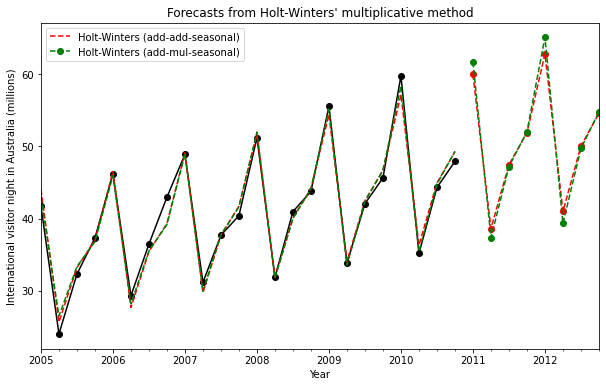

Figure: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.
           Additive  Multiplicative  Additive Dam  Multiplica Dam
α      1.490116e-08    1.490116e-08  1.490116e-08    1.490116e-08
β      1.409868e-08    9.187435e-25  6.490801e-09    5.042503e-09
ϕ               NaN             NaN  9.430416e-01    9.536043e-01
Γ      0.000000e+00    7.815349e-16  7.006146e-17    2.169996e-16
$l_0$  1.119347e+01    1.106375e+01  1.084021e+01    9.899269e+00
$b_0$  1.205395e-01    1.198956e-01  2.456749e-01    1.975442e-01
SSE    4.402746e+01    3.611262e+01  3.527619e+01    3.062033e+01


In [14]:
holts_winters_seasonal_model(aust)